Importing packages and initialization of data set arrays

In [62]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import glob

sns.set()
outputext = ".png"

try:
    os.mkdir("plots")
    os.mkdir("plots\Traveltime")
    os.mkdir("plots\Asocialness")
    os.mkdir("plots\Carcount")
except:
    pass

Importing data sets from csv

In [71]:
datafiles = glob.glob("output*.csv")
speedfiles = glob.glob("speeds*.csv")


temp = []
for file in datafiles:
    temp.append(pd.read_csv(file))

data = pd.concat(temp, ignore_index = True)

        
temp = []
for file in speedfiles :
    temp.append(pd.read_csv(file))
    
speeddata = pd.concat(temp, ignore_index = True)

#initialize iterator lists
asocialvalues = data["ASocial Rate"].unique()
roaddensities = data["Total Cars"].unique()
reactiontimes = data["Reaction Time"].unique()

In [70]:
data.head()

Travel Time  Max Speed  Reaction Time  Lane Changes  ASocial  \
0          194  64.791394            0.0             0    False   
1          230  62.499069            0.0             0    False   
2          259  55.244369            0.0             1    False   
3          254  68.485052            0.0             2    False   
4          221  52.719933            0.0             0    False   

   Number of Waves  Spacing Between Lights  Stoplight Active Time  Total Cars  \
0                1                      30                    1.0         100   
1                1                      30                    1.0         100   
2                1                      30                    1.0         100   
3                1                      30                    1.0         100   
4                1                      30                    1.0         100   

   ASocial Rate  Unnamed: 10  
0           0.0          NaN  
1           0.0          NaN  
2           0.0          NaN  
3           0.0          NaN  
4           0.0          NaN

In [72]:
speeddata.head()

Speed  Max Speed  Time Step  Reaction Time  Slowed  Total Cars  \
0  52.821213  52.821213        100            0.0   False         100   
1  59.789427  59.789427        100            0.0   False         100   
2  15.000000  62.123087        100            0.0    True         100   
3  56.583145  56.583145        100            0.0   False         100   
4  55.505820  55.505820        100            0.0   False         100   

   ASocial  ASocial Rate  Unnamed: 8  
0    False           0.0         NaN  
1    False           0.0         NaN  
2    False           0.0         NaN  
3    False           0.0         NaN  
4    False           0.0         NaN

In [134]:
sns.lineplot(x = "Total Cars", y = "Slowed", data = speeddata, hue = speeddata["Reaction Time"].astype('category'))
plt.show()

TypeError: data type not understood

Speed plots


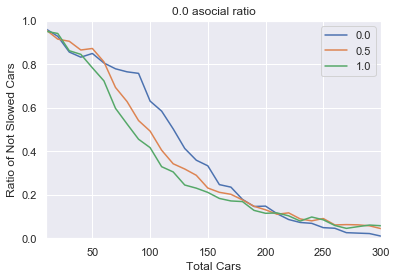

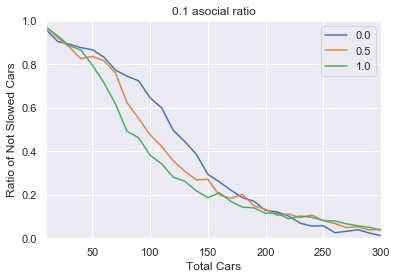

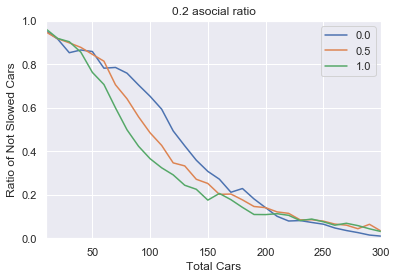

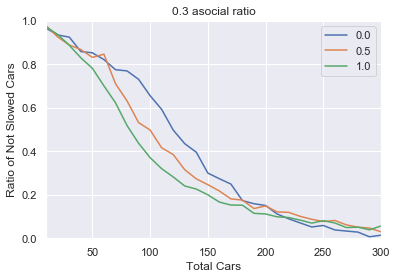

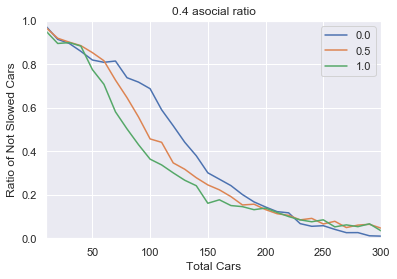

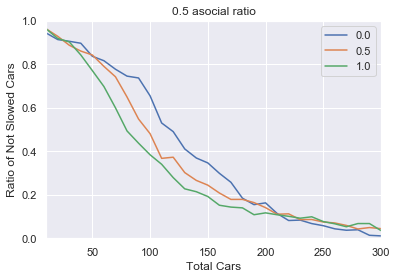

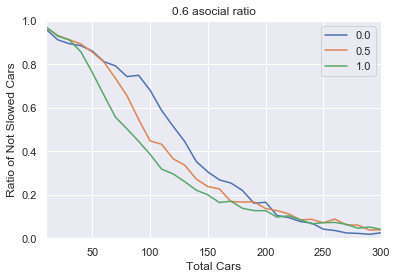

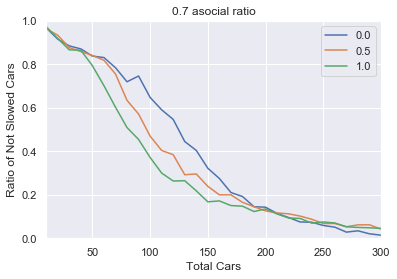

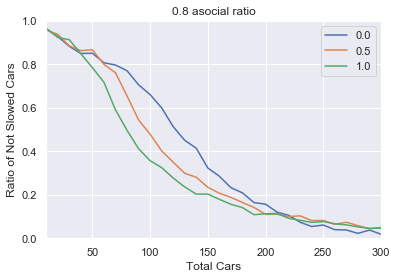

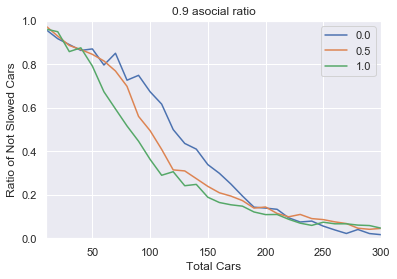

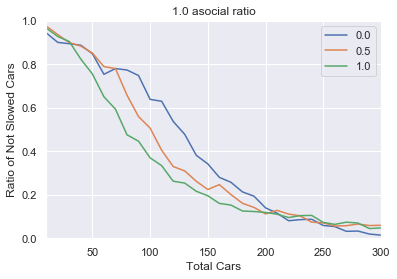

In [89]:
#for each asocial ratio
for value in speeddata["ASocial Rate"].unique():    
    bigslice = speeddata[speeddata["ASocial Rate"] == value]
    #for each rt
    for rt in reactiontimes:
        slowedratios = []
        dataslice = bigslice[bigslice["Reaction Time"] == rt]
        
        #for each roaddensity
        for density in roaddensities:
            smallslice = dataslice[dataslice["Total Cars"] == density]
            #get slowed ratio  
            # count rows for which Slowed = True
            slowed = smallslice[smallslice["Slowed"]]["Slowed"].count()
            # only get rows for which Slowed = False
            notslowed = smallslice[~smallslice["Slowed"]]["Slowed"].count()
        
            slowedratios.append(notslowed / (slowed + notslowed))
            
        #plot
        sns.lineplot(x = roaddensities, y = slowedratios, label = rt)
    plt.title("%s asocial ratio" % (value))
    plt.xlim(xmin = 10, xmax = 300)
    plt.ylim(ymin = 0, ymax = 1)
    
    plt.xlabel("Total Cars")
    plt.ylabel("Ratio of Not Slowed Cars")
    plt.show()

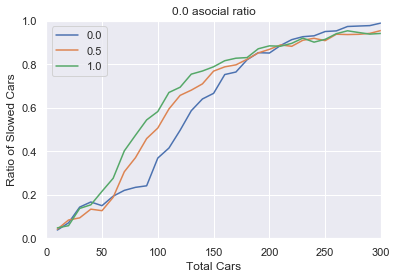

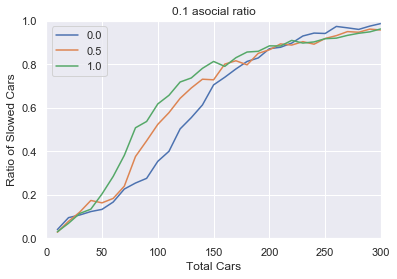

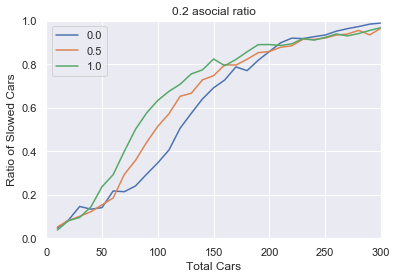

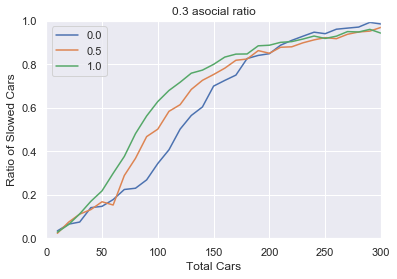

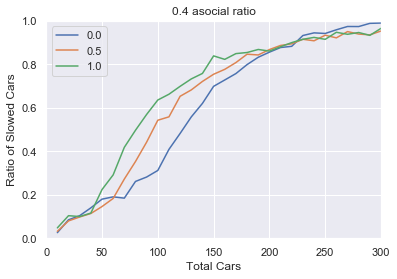

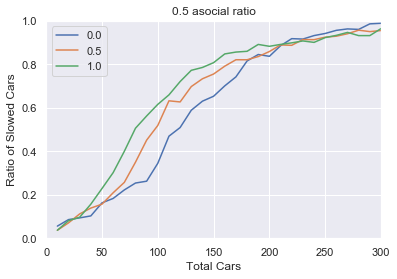

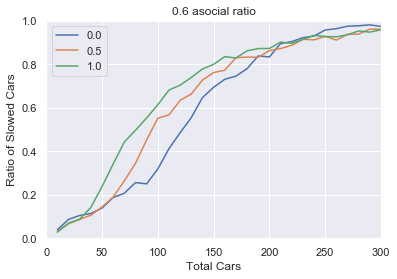

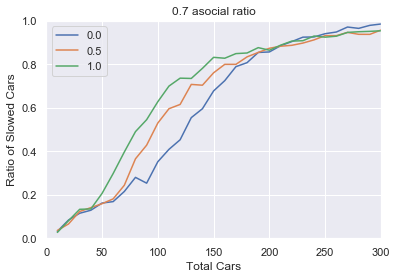

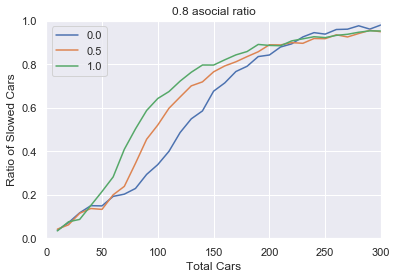

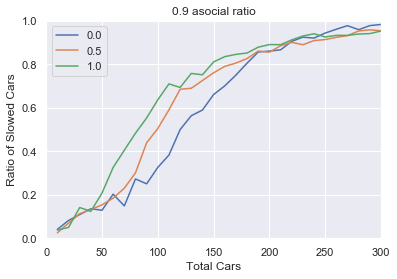

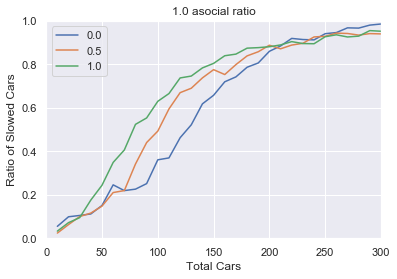

In [83]:
#for each asocial ratio
for value in speeddata["ASocial Rate"].unique():    
    bigslice = speeddata[speeddata["ASocial Rate"] == value]
    #for each rt
    for rt in reactiontimes:
        slowedratios = []
        dataslice = bigslice[bigslice["Reaction Time"] == rt]
        
        #for each roaddensity
        for density in roaddensities:
            smallslice = dataslice[dataslice["Total Cars"] == density]
            #get slowed ratio  
            # count rows for which Slowed = True
            slowed = smallslice[smallslice["Slowed"]]["Slowed"].count()
            # only get rows for which Slowed = False
            notslowed = smallslice[~smallslice["Slowed"]]["Slowed"].count()
        
            slowedratios.append(slowed / (slowed + notslowed))
            
        #plot
        sns.lineplot(x = roaddensities, y = slowedratios, label = rt)
    plt.title("%s asocial ratio" % (value))
    plt.xlim(xmin = 0, xmax = 300)
    plt.ylim(ymin = 0, ymax = 1)
    
    plt.xlabel("Total Cars")
    plt.ylabel("Ratio of Slowed Cars")
plt.show()

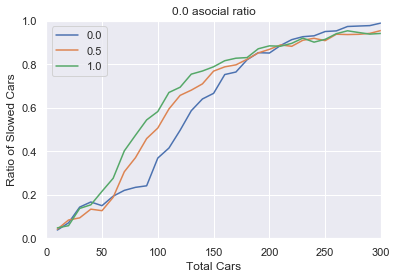

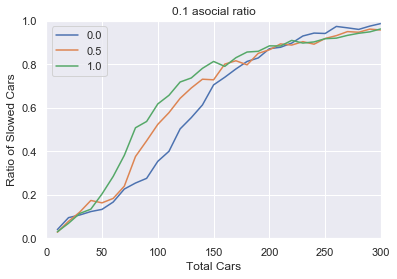

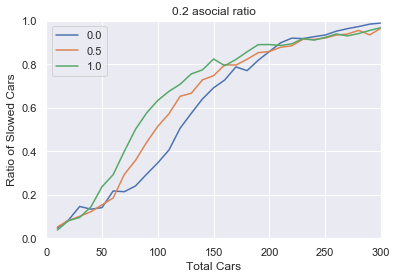

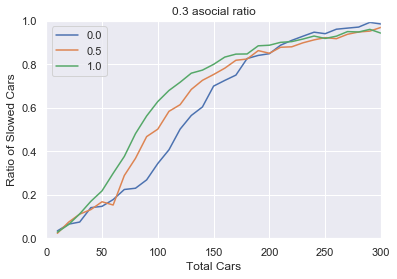

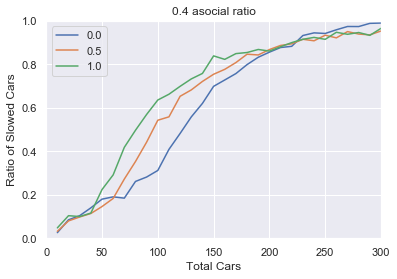

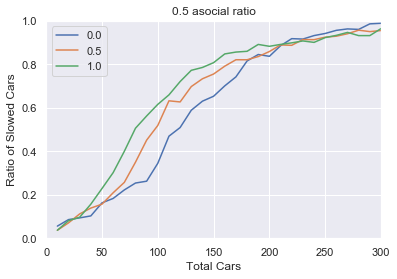

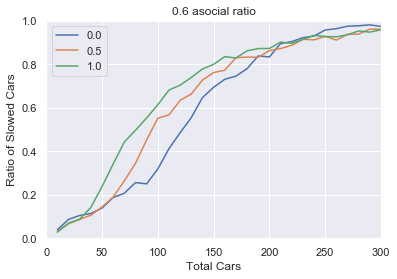

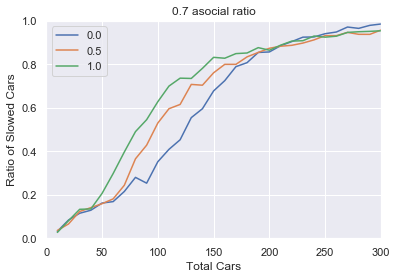

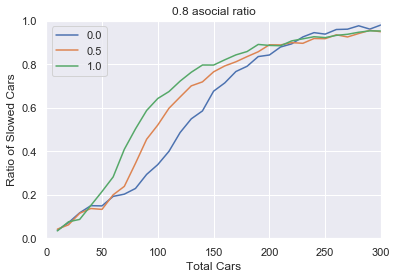

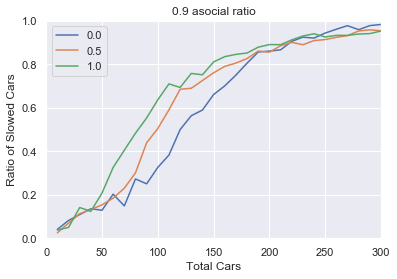

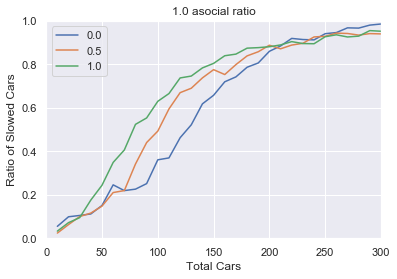

In [83]:
#for each asocial ratio
for value in speeddata["ASocial Rate"].unique():    
    bigslice = speeddata[speeddata["ASocial Rate"] == value]
    #for each rt
    for rt in reactiontimes:
        slowedratios = []
        dataslice = bigslice[bigslice["Reaction Time"] == rt]
        
        #for each roaddensity
        for density in roaddensities:
            smallslice = dataslice[dataslice["Total Cars"] == density]
            #get slowed ratio  
            # count rows for which Slowed = True
            slowed = smallslice[smallslice["Slowed"]]["Slowed"].count()
            # only get rows for which Slowed = False
            notslowed = smallslice[~smallslice["Slowed"]]["Slowed"].count()
        
            slowedratios.append(slowed / (slowed + notslowed))
            
        #plot
        sns.lineplot(x = roaddensities, y = slowedratios, label = rt)
    plt.title("%s asocial ratio" % (value))
    plt.xlim(xmin = 0, xmax = 300)
    plt.ylim(ymin = 0, ymax = 1)
    
    plt.xlabel("Total Cars")
    plt.ylabel("Ratio of Slowed Cars")
plt.show()

Travel time box plots

In [ ]:
for density in roaddensities:
    dataslice = data.loc[data["Total Cars"] == density]
    
    sns.boxplot(x = "ASocial Rate", y = "Travel Time", hue = "Reaction TIme", data = dataslice)

    plt.show()

Plotting Travel time per case

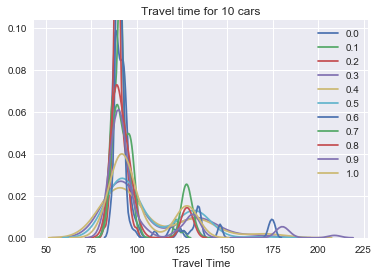

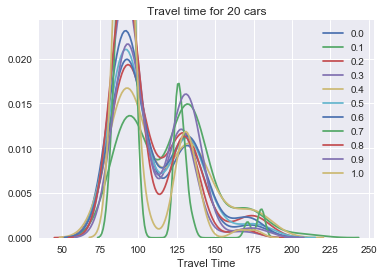

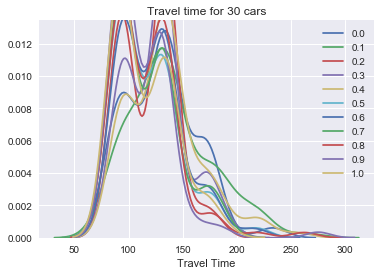

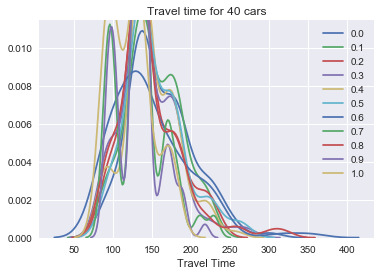

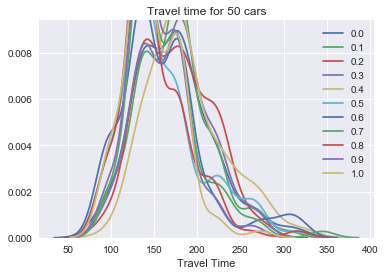

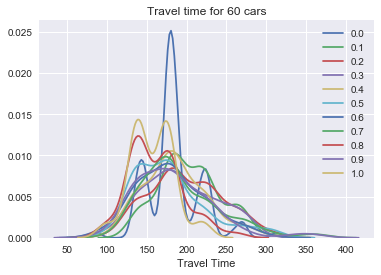

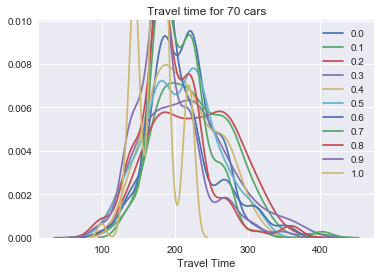

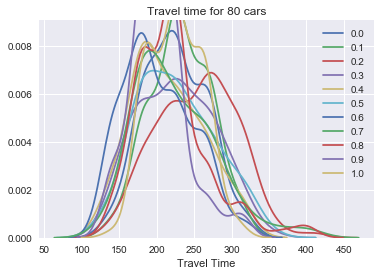

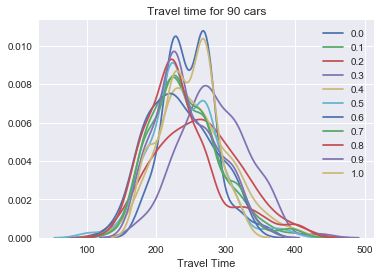

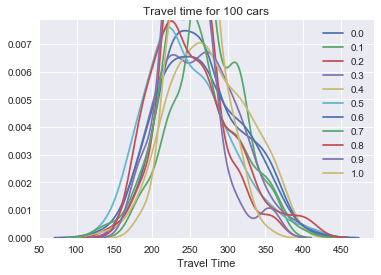

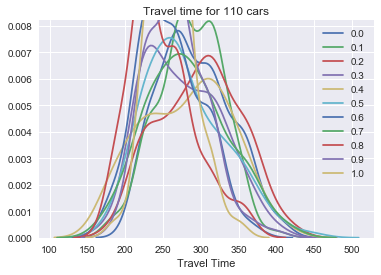

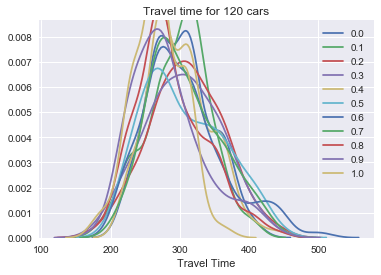

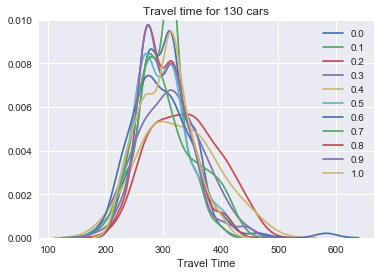

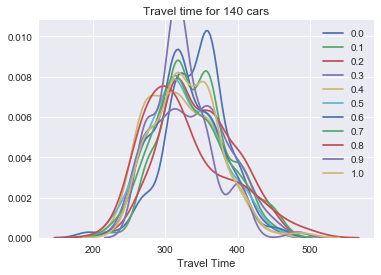

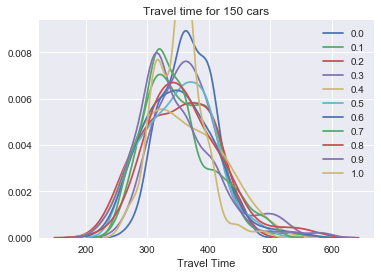

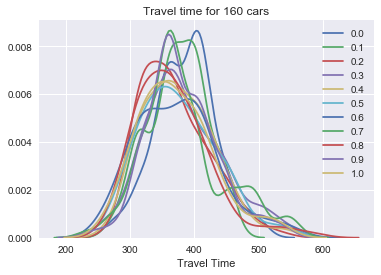

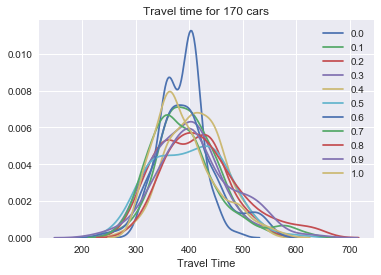

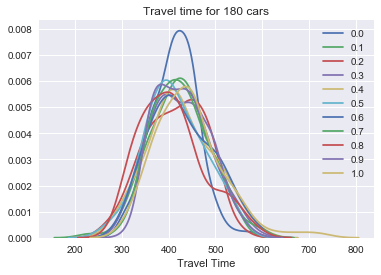

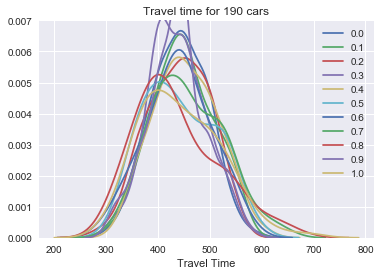

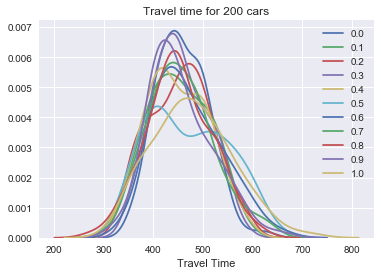

In [3]:
for density in roaddensities:
    for value in asocial_values:
        sns.distplot(data[density][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = value)
        
    #plt.xlim(0, 1500)
    plt.title('Travel time for %s cars' % (density))
    plt.legend()
    plt.savefig('plots\Traveltime\Traveltimes%s.jpg' % (density))
    plt.show()



Plot Travel Time boxplots per case

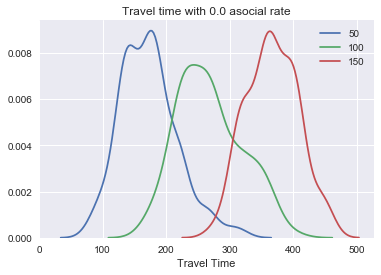

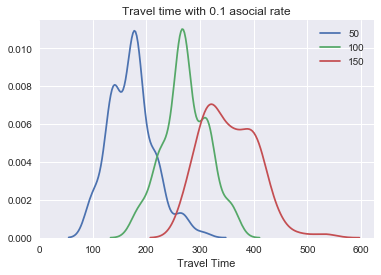

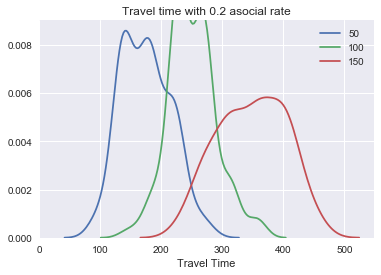

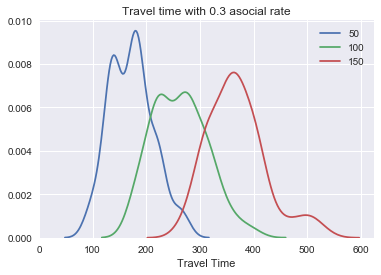

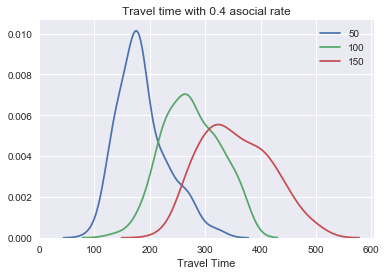

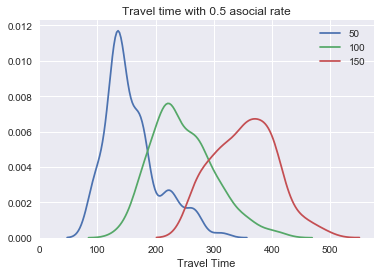

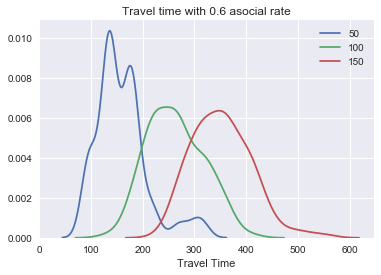

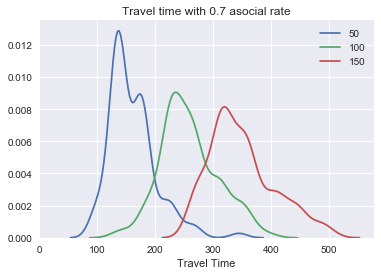

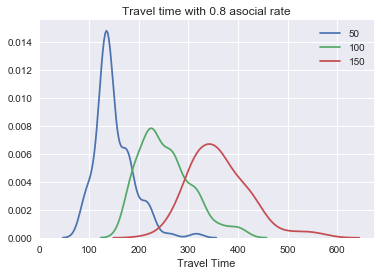

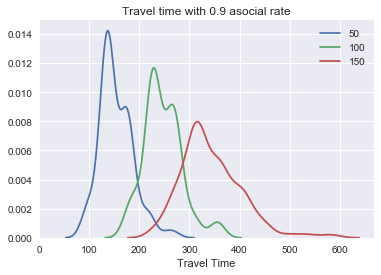

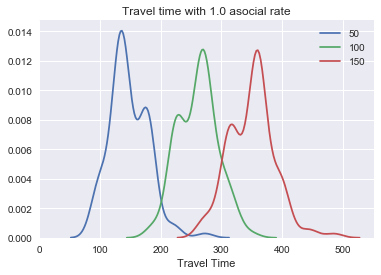

In [4]:
for value in asocial_values:
    sns.distplot(data[50][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 50)
    sns.distplot(data[100][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 100)
    sns.distplot(data[150][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 150)
        
    plt.xlim(xmin=0)
    plt.title('Travel time with %s asocial rate' % (value))
    plt.legend()
    plt.savefig('plots\Traveltime\Asocial%s_3cases.jpg' % (value))
    plt.show()



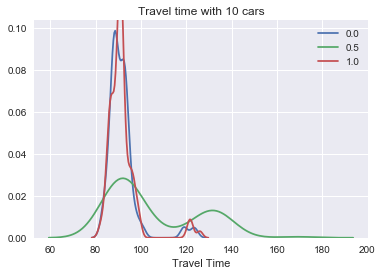

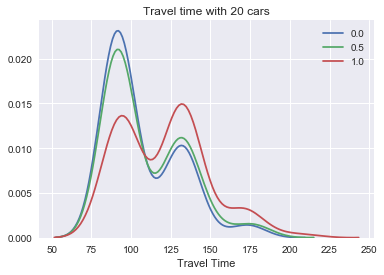

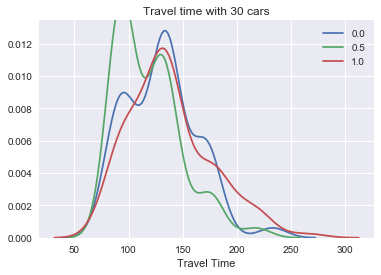

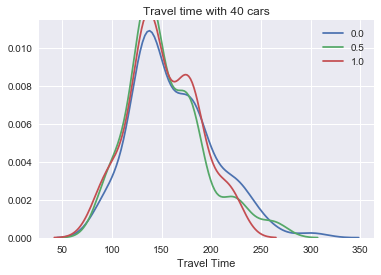

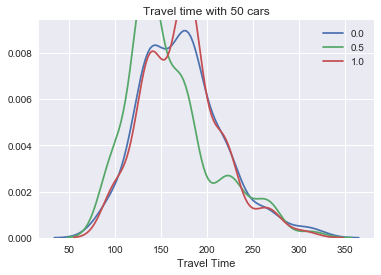

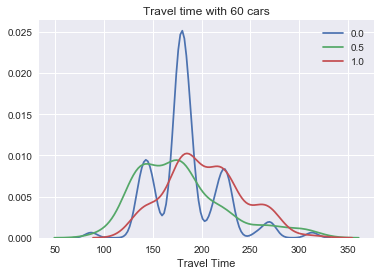

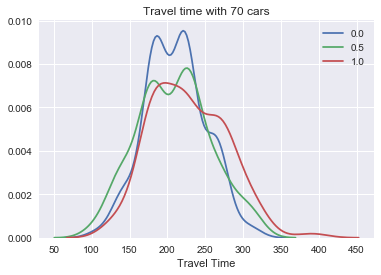

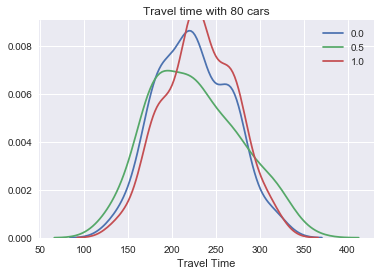

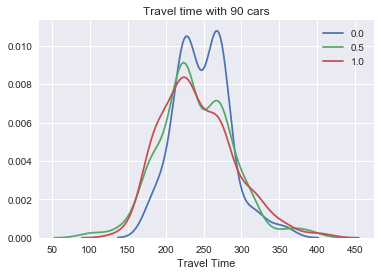

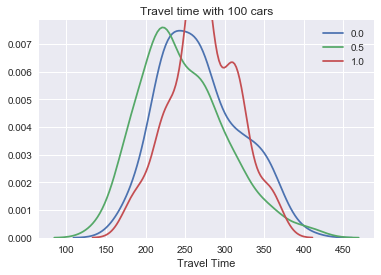

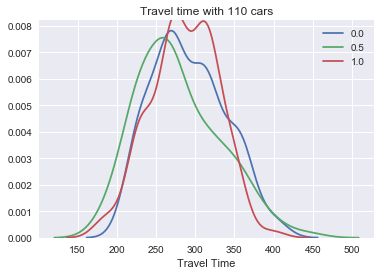

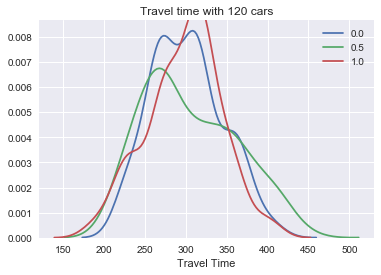

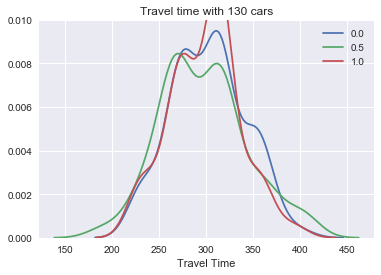

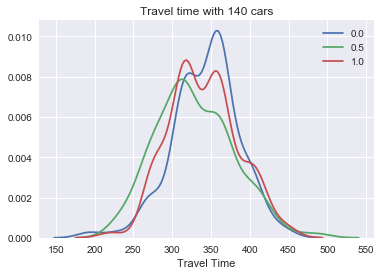

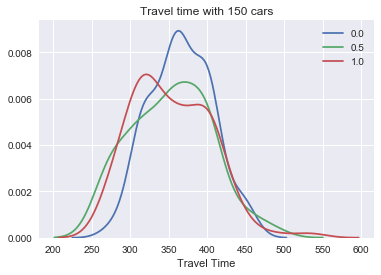

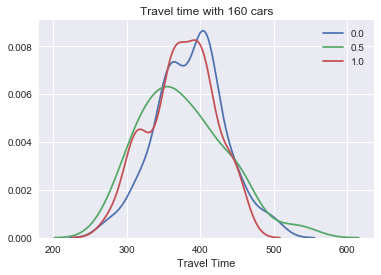

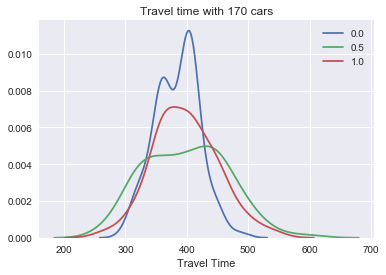

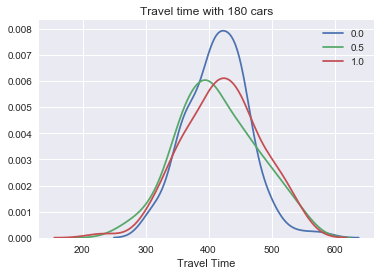

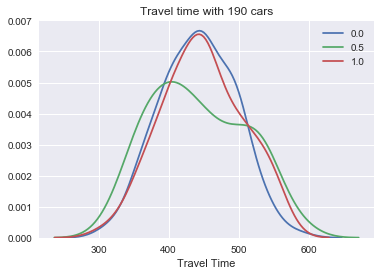

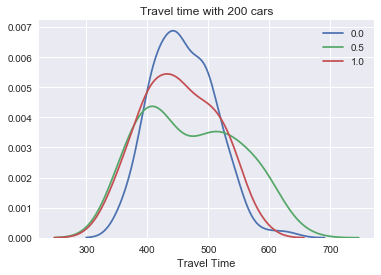

In [5]:
for density in roaddensities:
    sns.distplot(data[density][0.0]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 0.0)
    sns.distplot(data[density][0.5]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 0.5)
    sns.distplot(data[density][0.1]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 1.0)
        
    #plt.xlim(0, 1500)
    plt.title('Travel time with %s cars' % (density))
    plt.legend()
    plt.savefig('plots\Traveltime\Density%s_3cases.jpg' % (density))
    plt.show()



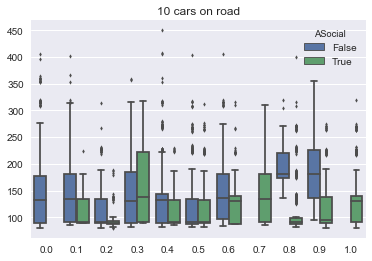

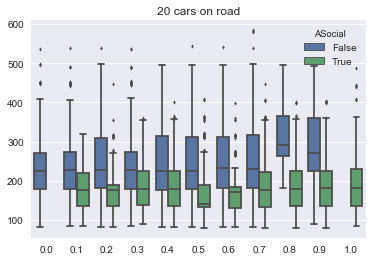

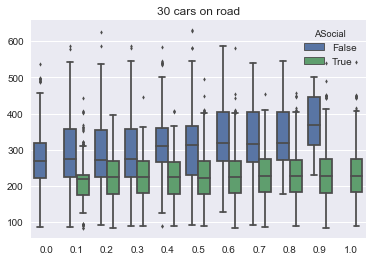

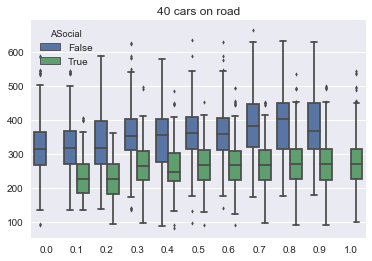

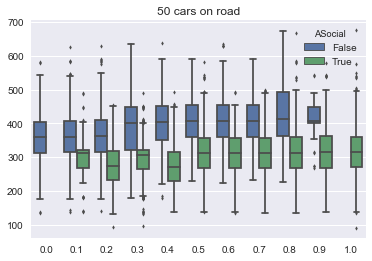

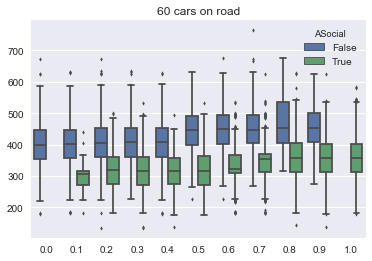

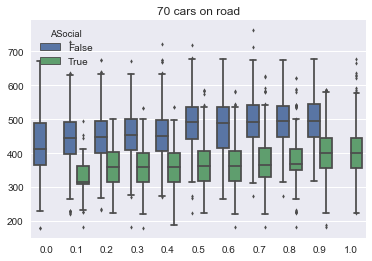

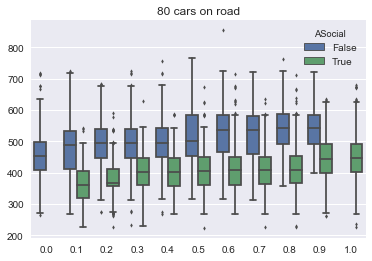

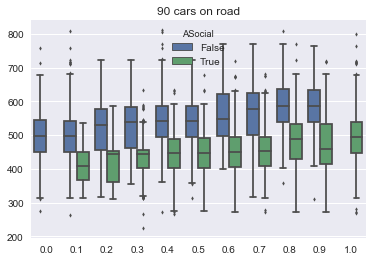

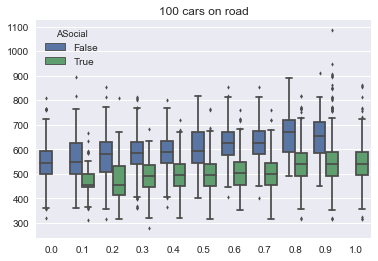

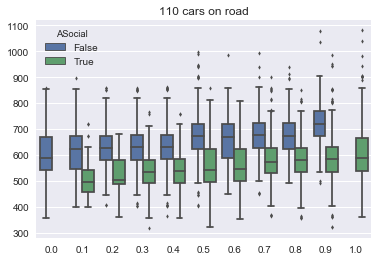

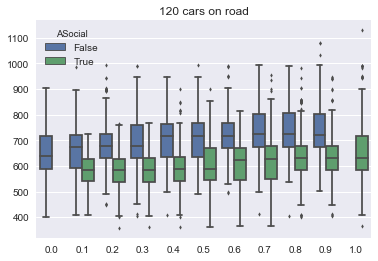

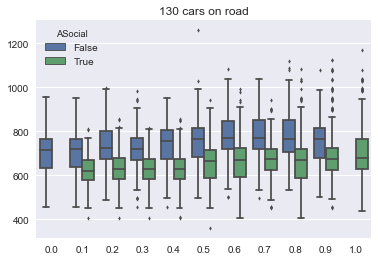

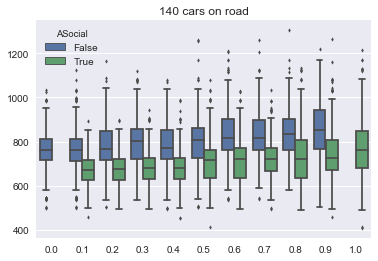

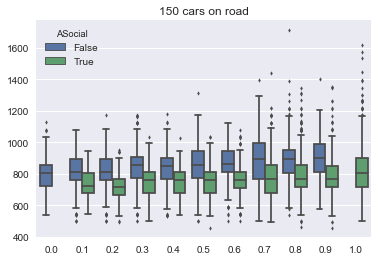

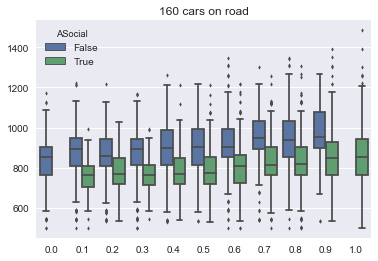

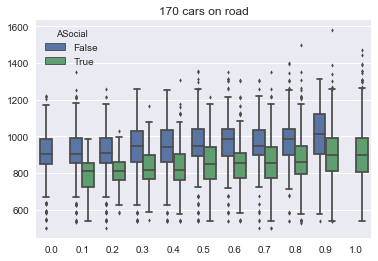

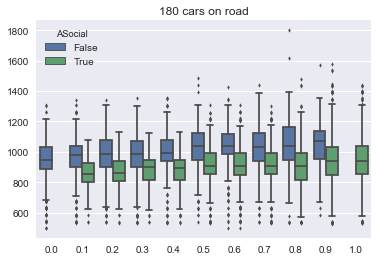

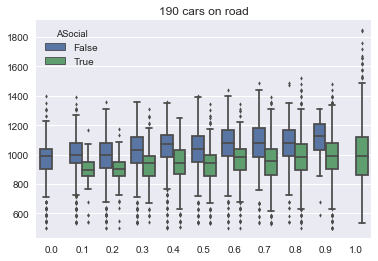

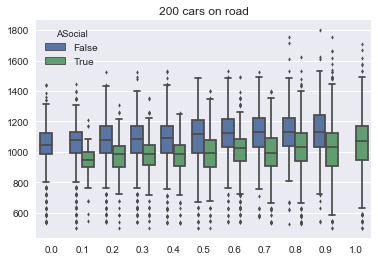

In [7]:
for density in roaddensities:
    sns.boxplot(x = 'ASocial Rate', y = 'Travel Time', hue = 'ASocial', data = pd.concat(data[density]), fliersize = 3)
    plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    #plt.ylim(ymax=2000)
    plt.savefig('plots\Asocialness\TT_boxplot_for_%s_cars.jpg' % (density))
    plt.show()

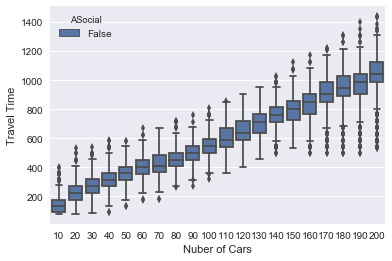

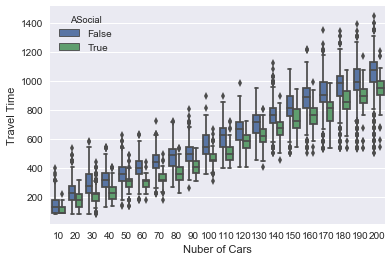

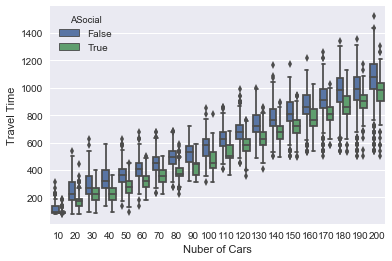

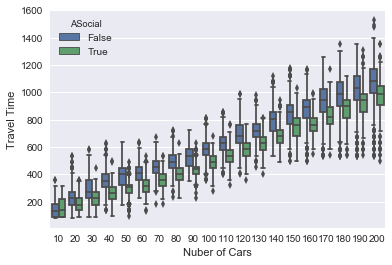

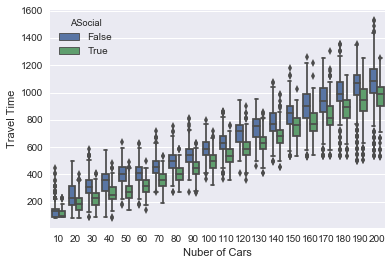

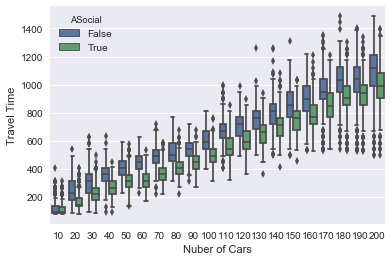

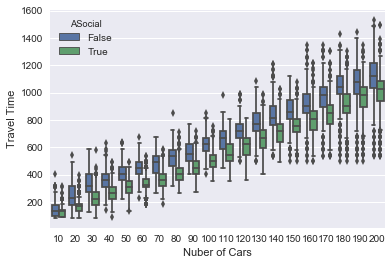

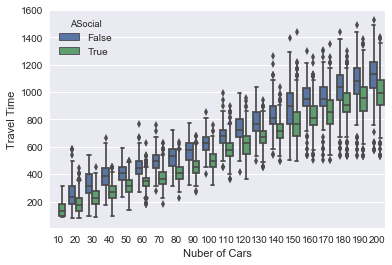

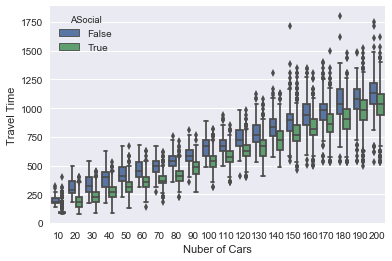

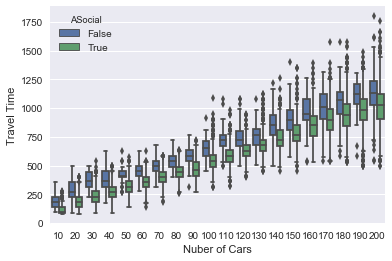

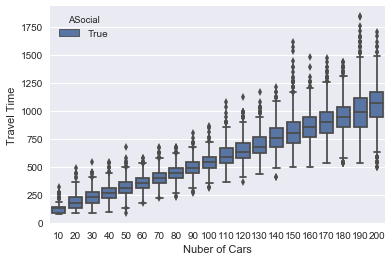

In [8]:
for density in roaddensities:
    for asocialrate in asocial_values:
        data[density][asocialrate]['Density'] = density

for asocialrate in asocial_values:
    databydensity = pd.DataFrame({})
    for density in roaddensities:
        databydensity = pd.concat([databydensity, data[density][asocialrate]])
        
    sns.boxplot(x = 'Density', y = 'Travel Time', hue = 'ASocial', data = databydensity)
    plt.xlabel("Nuber of Cars")
    plt.savefig('plots\Carcount\TT_bocplot_for_%s_asocialness.jpg' % (asocialrate))
    plt.show()
    
        

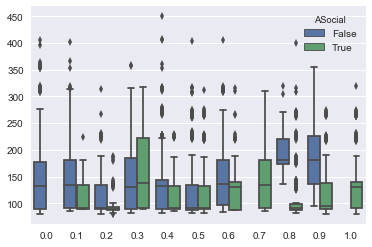

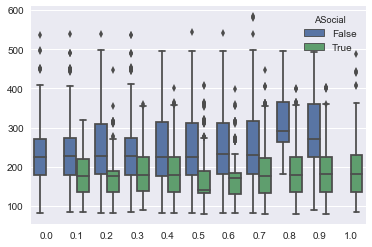

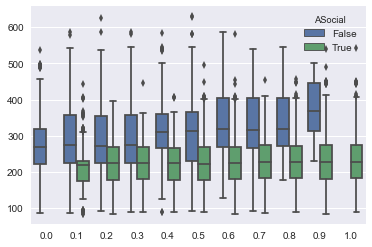

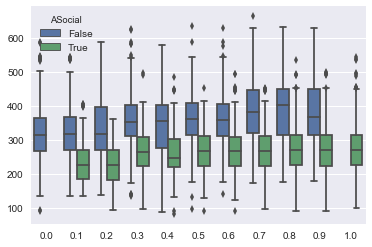

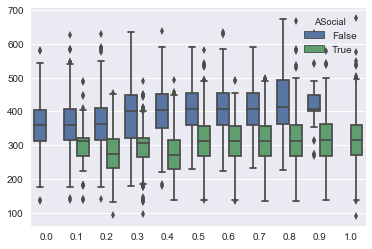

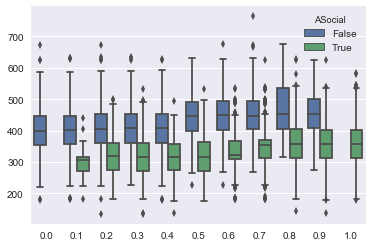

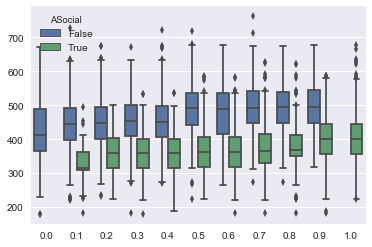

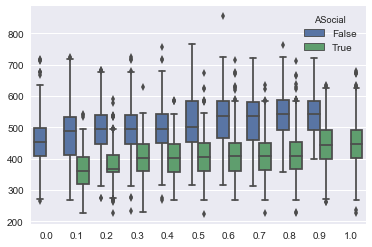

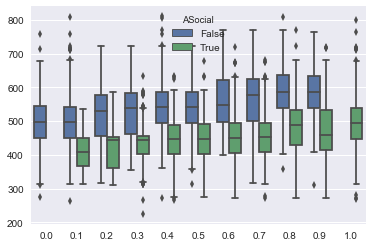

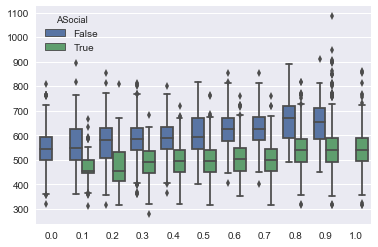

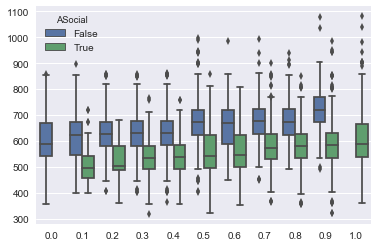

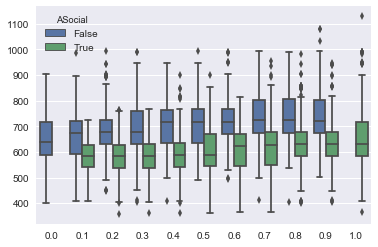

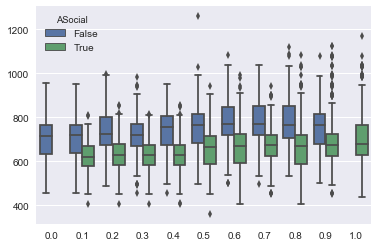

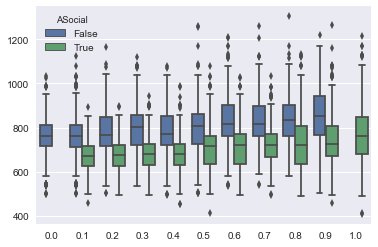

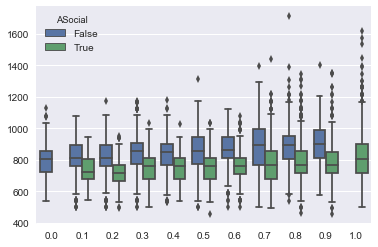

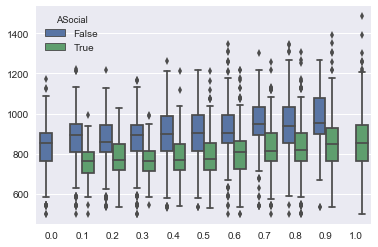

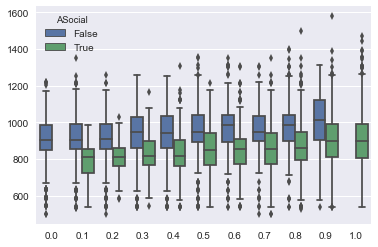

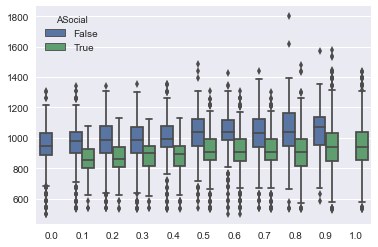

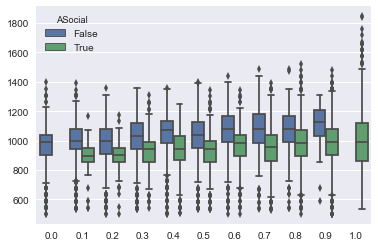

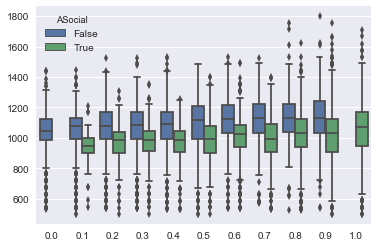

In [9]:
for density in roaddensities:
    sns.boxplot(x = 'ASocial Rate', y = 'Travel Time', hue = 'ASocial', data = pd.concat(data[density], ignore_index = True))
    #plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    #plt.ylim(ymax=900)
    plt.show()

Plot Lane Change counts per case

In [ ]:
for density in roaddensities:
    alldata = pd.concat(data[density])
    ax = sns.boxplot(x = 'Selfishness', y = 'Lane Changes', hue = 'Selfish', data = alldata[alldata['Selfish']])
    
    ax.legend_.remove()
    
    #plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    plt.ylim(ymax=80)
    plt.savefig('plots\lanechanges_%s_cars_nolabel.jpg' % (density))
    plt.show()